COMEÇANDO A VIZUALISAR OS DADOS

In [335]:
#importar as blibiotecas 
import pandas as pd
import numpy as np

In [336]:
#importar blibioteca
base = pd.read_csv('train.csv')

In [337]:
#visualizando a base 
base.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [338]:
#visualizando quantidade de colunas e linhas
base.shape

(1460, 81)

In [339]:
#olhando as informações de fomar mais detalhada
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

COMEÇANDO A EXPLORAR OS DADOS

In [340]:
#visualizar a quantidade de valores vazios  
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [341]:
#eliminar os valores vazios com mais de 10% de valores vazios 
eliminar = base.columns[(base.isnull().sum()/base.shape[0] > 0.1)]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [342]:
#eliminando as colunas 
base = base.drop(eliminar, axis=1)

In [343]:
#revisando os valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
WoodDeckSF      0.000000
PavedDrive      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
dtype: float64

In [344]:
#Selecionando as colunas numericas
base.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 74, dtype: object

In [345]:
#separando as colunas apenas numericas 
colunas = base.columns[base.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [346]:
#criar outra base de dados apenas com as colunas numericas 
baseCN = base.loc[:,colunas]
baseCN.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [347]:
#vizualizando os valores vazios da baseCN
baseCN.isnull().sum().sort_values(ascending=False).head(5)

GarageYrBlt     81
MasVnrArea       8
Id               0
OpenPorchSF      0
KitchenAbvGr     0
dtype: int64

In [348]:
#substituindo os valores vazios por -1, que é um numero neutro 
baseCN = baseCN.fillna(1)

baseCN.isnull().sum().sort_values(ascending=False).head(5)

In [349]:
#sem nenhum valor vazio 
baseCN.isnull().sum().sort_values(ascending=False).head(5)

Id              0
HalfBath        0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
dtype: int64

CRIANDO 3 MODELOS BÁSICOS, QUE SERÃO A REGRESSÃO LINEAR, ÁRVORE DE DECISÃO E KMN BUSCANDO QUAL SERÁ O MELHOR PARA ESSA APLICAÇÃO 

In [350]:
# X e Y 
x = baseCN.drop ('SalePrice', axis=1)
y = baseCN.SalePrice

In [351]:
#importar o train_test_split 
from sklearn.model_selection import train_test_split



In [352]:
#separando a base em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [353]:
#importando regressão linear 
from sklearn.linear_model import LinearRegression

In [354]:
#criar o regressor da regressão linear e fazer o fit com os dados de treino 
reg_linearReg = LinearRegression().fit(X_train, y_train)

In [355]:
#fazer a previsão para os dados de teste da regressão linear
y_linearReg = reg_linearReg.predict(X_test)

In [356]:
#importando a árvore de regressão
from sklearn import tree 

In [357]:
#criar o regressor da arvore de decisão e fazer o fit com os dados de treino 
reg_TreeReg = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [358]:
#fazer a previsão para os dados de teste da arvore de decisão
y_TreeReg = reg_TreeReg.predict(X_test)

In [359]:
#importando a KNM
from sklearn.neighbors import KNeighborsRegressor

In [360]:
#criar o regressor do KNM o fit com os dados de treino 
reg_KNM = KNeighborsRegressor(n_neighbors= 2).fit(X_train, y_train)

In [361]:
#fazer a previsão para os dados de teste do KMN 
y_KMN = reg_KNM.predict(X_test)

In [362]:
#importar o erro médio absoluto 
from sklearn.metrics import mean_absolute_error

In [363]:
#importar o erro médio quadratico
from sklearn.metrics import mean_squared_error

In [364]:
#erro da regressão linear
print(mean_absolute_error(y_test, y_linearReg))
print(mean_squared_error(y_test, y_linearReg))

23763.3425668329
1533974162.7471564


In [365]:
#erro da árvore de decisão 
print(mean_absolute_error(y_test, y_TreeReg))
print(mean_squared_error(y_test, y_TreeReg))

27580.78838174274
2530245114.701245


In [366]:
#erro do KNM 
print(mean_absolute_error(y_test, y_KMN))
print(mean_squared_error(y_test, y_KMN))


33273.08298755187
2733937586.841286


USAR FERRAMENTAS PARA VISULIZAÇÃO DOS DADOS DE FORMA MAIS DINAMICA USANDO GRAFICOS 

In [367]:
#importando matplotlib
import matplotlib.pyplot as plt

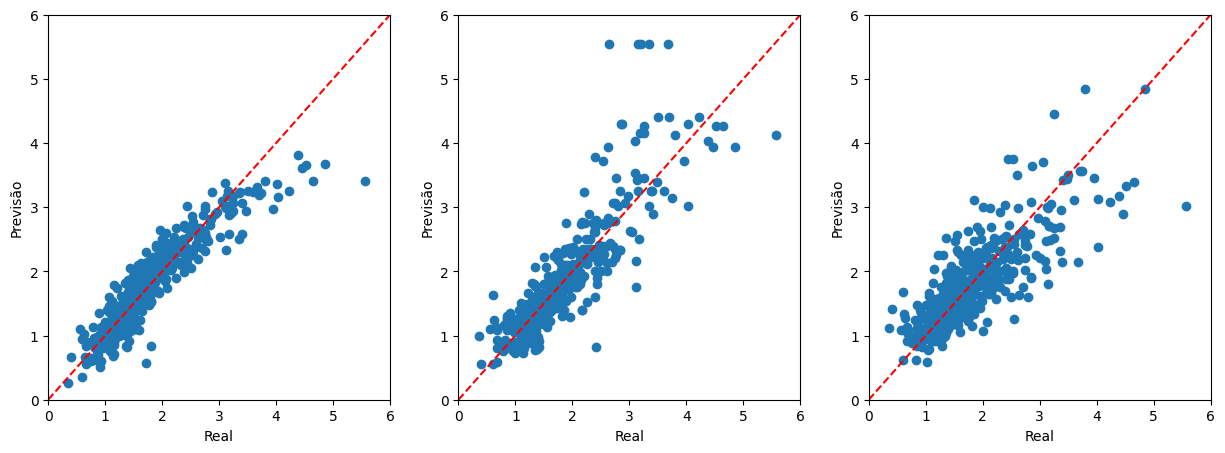

In [368]:
#criando o grafico 
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_linearReg/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_TreeReg/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_KMN/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 6),ylim=(0, 6))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 6),ylim=(0, 6))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 6),ylim=(0, 6))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()